In [1]:

import pandas as pd


2024-07-10 10:37:32,625 - INFO - Loading configuration.
2024-07-10 10:37:32,627 - INFO - Configuration loaded successfully from ../config/paths.yaml.
2024-07-10 10:37:32,674 - INFO - Configuration loaded successfully from ../config/feature_metadata.yaml.
2024-07-10 10:37:32,675 - INFO - Loading training data.
Loading ../data/raw/train.csv: 9it [00:00, 15.88it/s]
2024-07-10 10:37:33,346 - INFO - Loading test data.
Loading ../data/raw/test.csv: 9it [00:00, 16.50it/s]
2024-07-10 10:37:33,987 - INFO - Generating summary statistics for training data.


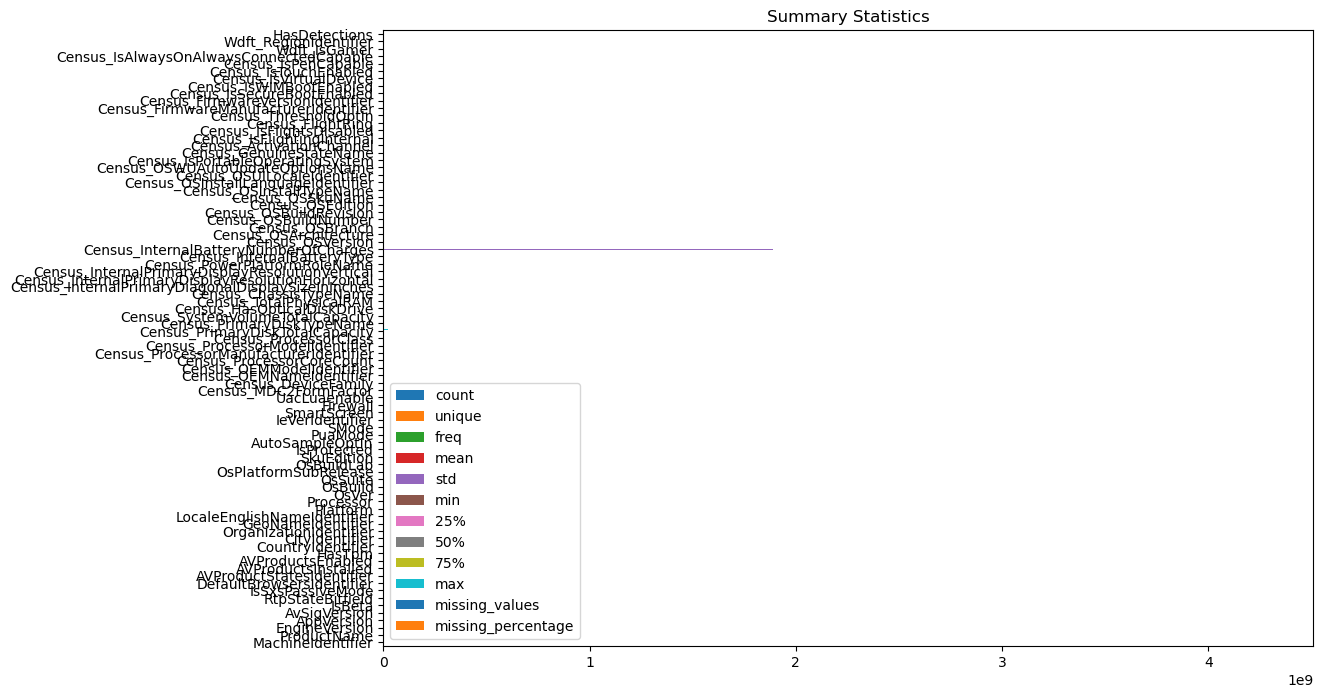

2024-07-10 10:37:35,365 - INFO - Generating summary statistics for test data.


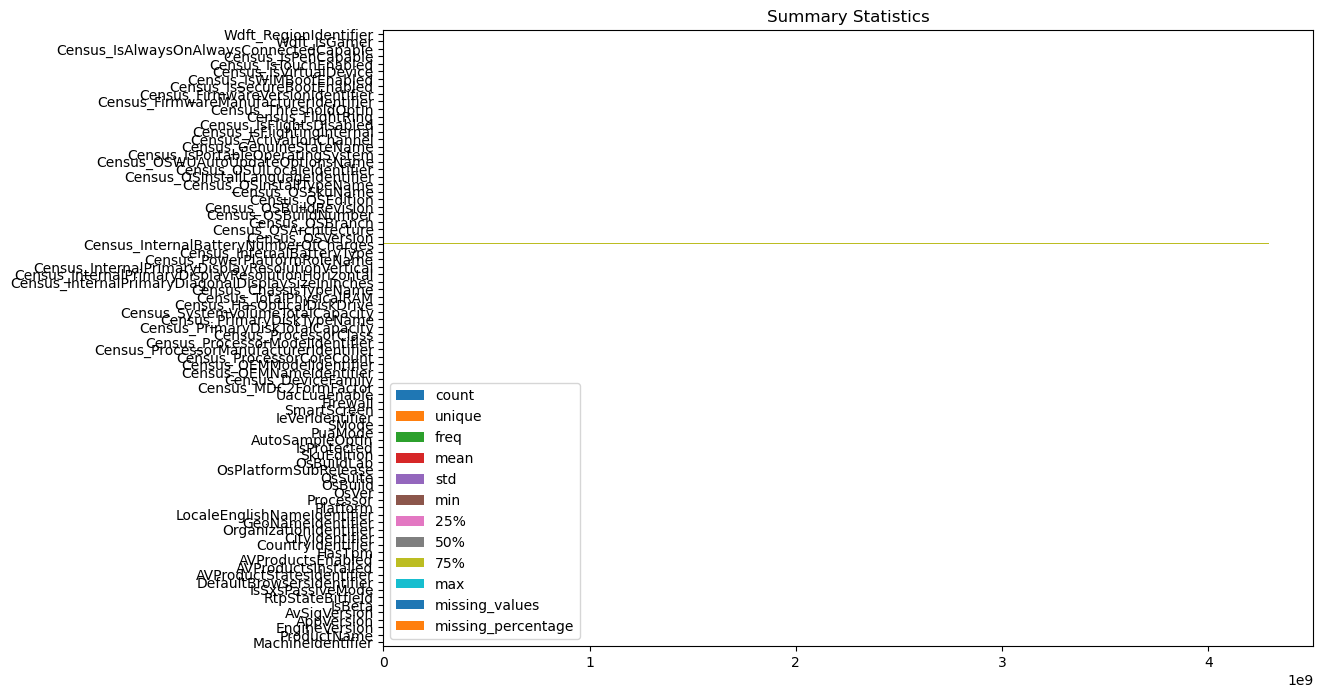

2024-07-10 10:37:36,686 - INFO - Train Summary Statistics:
2024-07-10 10:37:36,689 - INFO - Test Summary Statistics:
2024-07-10 10:37:36,691 - INFO - Performing correlation analysis.


                                            count  unique  \
MachineIdentifier                          100000  100000   
ProductName                                100000       2   
EngineVersion                              100000      42   
AppVersion                                 100000      80   
AvSigVersion                               100000    4027   
...                                           ...     ...   
Census_IsPenCapable                      100000.0     NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   99157.0     NaN   
Wdft_IsGamer                              96585.0     NaN   
Wdft_RegionIdentifier                     96585.0     NaN   
HasDetections                            100000.0     NaN   

                                                                      top  \
MachineIdentifier                        02517f14f093d92f620ec685d0ad15df   
ProductName                                                  win8defender   
EngineVersion                       

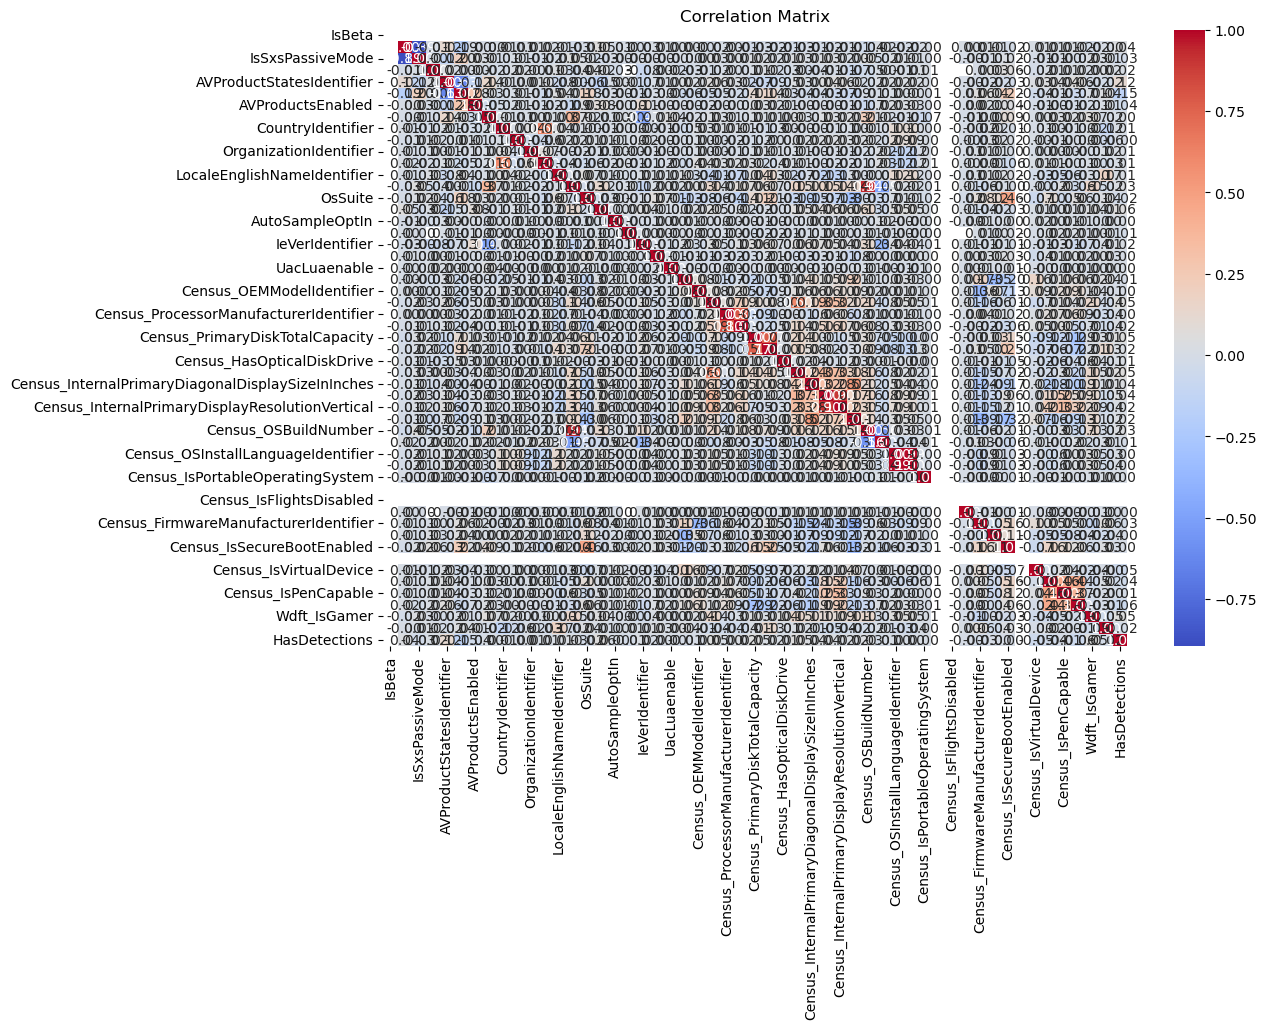

2024-07-10 10:37:39,036 - INFO - Suggesting imputation strategies.
2024-07-10 10:37:39,037 - INFO - Handling missing values.
2024-07-10 10:37:39,045 - INFO - Imputation strategies updated successfully in ../config/imputation_strategies.yaml.
2024-07-10 10:37:39,045 - INFO - Updated Imputation Strategies: {'imputation_strategies': {'imputation_strategies': {'RtpStateBitfield': 'mean', 'DefaultBrowsersIdentifier': 'mean', 'AVProductStatesIdentifier': 'median', 'AVProductsInstalled': 'median', 'AVProductsEnabled': 'mean', 'CityIdentifier': 'mean', 'OrganizationIdentifier': 'mean', 'GeoNameIdentifier': 'mean', 'OsBuildLab': 'mode', 'IsProtected': 'mean', 'PuaMode': 'mode', 'SMode': 'mean', 'IeVerIdentifier': 'mean', 'SmartScreen': 'mode', 'Firewall': 'mean', 'UacLuaenable': 'mean', 'Census_OEMNameIdentifier': 'mean', 'Census_OEMModelIdentifier': 'mean', 'Census_ProcessorCoreCount': 'mean', 'Census_ProcessorManufacturerIdentifier': 'mean', 'Census_ProcessorModelIdentifier': 'mean', 'Census_

In [2]:
import os
import sys
sys.path.append('../src')

import pandas as pd
import logging
from data.load_data import load_data
from analysis.data_understanding import initial_data_analysis, save_cleaned_data
from config_loader import load_config, get_feature_metadata

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def main():
    try:
        # Load configuration
        logger.info("Loading configuration.")
        config = load_config('../config/paths.yaml')

        # Validate file paths
        if not os.path.exists(config['data_paths']['train_data']) or not os.path.exists(config['data_paths']['test_data']):
            logger.error("One or more data paths specified in the configuration do not exist.")
            return

        # Define data types to avoid mixed types warnings
        feature_config = load_config(config['config_paths']['feature_metadata'])
        feature_metadata = get_feature_metadata(feature_config)
        dtype_mapping = {feature: 'category' if feature_metadata[feature]['data_type'] == 'category' else 'float64' 
                         for feature in feature_metadata}

        # Load a smaller chunk of the data for initial analysis with progress bar
        logger.info("Loading training data.")
        train_chunk = load_data(config['data_paths']['train_data'], nrows=100000, dtype=dtype_mapping)
        logger.info("Loading test data.")
        test_chunk = load_data(config['data_paths']['test_data'], nrows=100000, dtype=dtype_mapping)

        # Perform initial data analysis
        train_chunk, test_chunk = initial_data_analysis(train_chunk, test_chunk, config)

        # Save the cleaned data
        save_cleaned_data(train_chunk, test_chunk, config)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        raise

if __name__ == "__main__":
    main()


2024-07-10 07:48:58,368 - INFO - Loading configuration.
2024-07-10 07:48:58,369 - INFO - Configuration loaded successfully from ../config/paths.yaml.
2024-07-10 07:48:58,417 - INFO - Configuration loaded successfully from ../config/feature_metadata.yaml.
2024-07-10 07:48:58,418 - INFO - Loading training data.
Loading ../data/raw/train.csv: 9it [00:00, 14.36it/s]
2024-07-10 07:48:59,153 - INFO - Loading test data.
Loading ../data/raw/test.csv: 9it [00:00, 15.38it/s]
2024-07-10 07:48:59,836 - INFO - Generating summary statistics for training data.
2024-07-10 07:49:00,134 - INFO - Generating summary statistics for test data.
2024-07-10 07:49:00,444 - INFO - Train Summary Statistics:
2024-07-10 07:49:00,448 - INFO - Test Summary Statistics:
2024-07-10 07:49:00,450 - INFO - Performing correlation analysis.


                                            count  unique  \
MachineIdentifier                          100000  100000   
ProductName                                100000       2   
EngineVersion                              100000      42   
AppVersion                                 100000      80   
AvSigVersion                               100000    4027   
...                                           ...     ...   
Census_IsPenCapable                      100000.0     NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   99157.0     NaN   
Wdft_IsGamer                              96585.0     NaN   
Wdft_RegionIdentifier                     96585.0     NaN   
HasDetections                            100000.0     NaN   

                                                                      top  \
MachineIdentifier                        0132c34feb175469cd57ffe75b270dc7   
ProductName                                                  win8defender   
EngineVersion                       

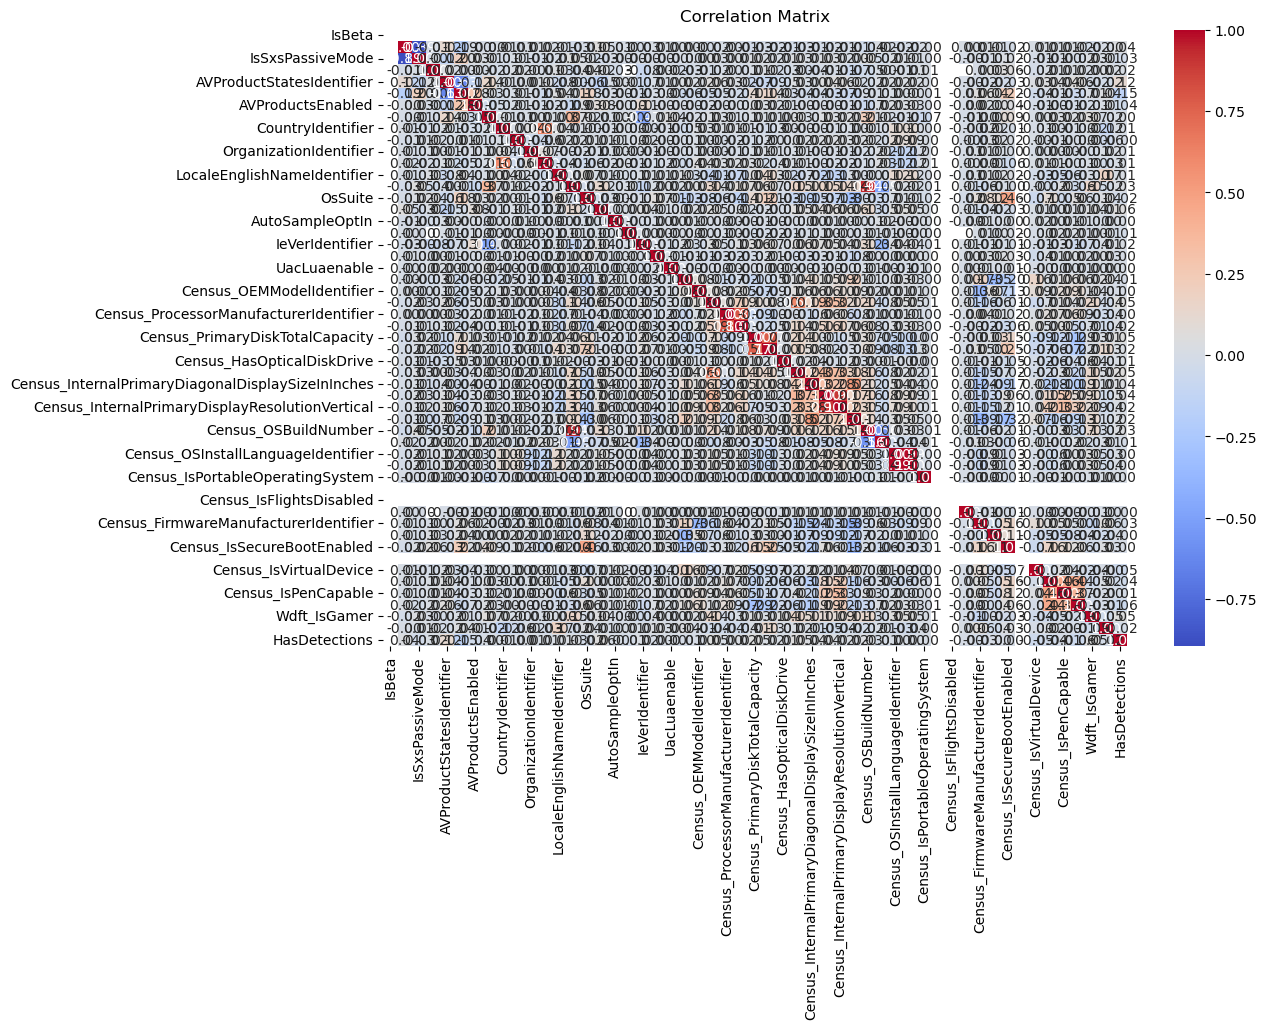

2024-07-10 07:49:02,153 - INFO - Suggesting imputation strategies.
2024-07-10 07:49:02,156 - ERROR - An error occurred during initial data analysis: 'function' object is not subscriptable
2024-07-10 07:49:02,156 - ERROR - An error occurred: 'function' object is not subscriptable


TypeError: 'function' object is not subscriptable

In [2]:
import os
import sys
sys.path.append('../src')

import pandas as pd
import logging
from data.load_data import load_data
from analysis.data_understanding import initial_data_analysis, save_cleaned_data
from config_loader import load_config, get_feature_metadata

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def main():
    try:
        # Load configuration
        logger.info("Loading configuration.")
        config = load_config('../config/paths.yaml')

        # Validate file paths
        if not os.path.exists(config['data_paths']['train_data']) or not os.path.exists(config['data_paths']['test_data']):
            logger.error("One or more data paths specified in the configuration do not exist.")
            return

        # Define data types to avoid mixed types warnings
        feature_config = load_config(config['config_paths']['feature_metadata'])
        feature_metadata = get_feature_metadata(feature_config)
        dtype_mapping = {feature: 'category' if feature_metadata[feature]['data_type'] == 'category' else 'float64' 
                         for feature in feature_metadata}

        # Load a smaller chunk of the data for initial analysis with progress bar
        logger.info("Loading training data.")
        train_chunk = load_data(config['data_paths']['train_data'], nrows=100000, dtype=dtype_mapping)
        logger.info("Loading test data.")
        test_chunk = load_data(config['data_paths']['test_data'], nrows=100000, dtype=dtype_mapping)

        # Perform initial data analysis
        train_chunk, test_chunk = initial_data_analysis(train_chunk, test_chunk, config)

        # Save the cleaned data
        save_cleaned_data(train_chunk, test_chunk, config)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        raise

if __name__ == "__main__":
    main()


2024-07-10 07:35:04,551 - INFO - Loading configuration.
2024-07-10 07:35:04,553 - INFO - Configuration loaded successfully from ../config/paths.yaml.
2024-07-10 07:35:04,600 - INFO - Configuration loaded successfully from ../config/feature_metadata.yaml.
2024-07-10 07:35:04,600 - INFO - Loading training data.
Loading ../data/raw/train.csv: 9it [00:00, 15.99it/s]
2024-07-10 07:35:05,265 - INFO - Loading test data.
Loading ../data/raw/test.csv: 9it [00:00, 15.57it/s]
2024-07-10 07:35:05,953 - INFO - Generating summary statistics for training data.
2024-07-10 07:35:06,259 - INFO - Generating summary statistics for test data.
2024-07-10 07:35:06,571 - INFO - Train Summary Statistics:
2024-07-10 07:35:06,575 - INFO - Test Summary Statistics:
2024-07-10 07:35:06,576 - INFO - Performing correlation analysis.


                                            count  unique  \
MachineIdentifier                          100000  100000   
ProductName                                100000       2   
EngineVersion                              100000      42   
AppVersion                                 100000      80   
AvSigVersion                               100000    4027   
...                                           ...     ...   
Census_IsPenCapable                      100000.0     NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   99157.0     NaN   
Wdft_IsGamer                              96585.0     NaN   
Wdft_RegionIdentifier                     96585.0     NaN   
HasDetections                            100000.0     NaN   

                                                                      top  \
MachineIdentifier                        01ad8301a1c2e734d00723ea30071b64   
ProductName                                                  win8defender   
EngineVersion                       

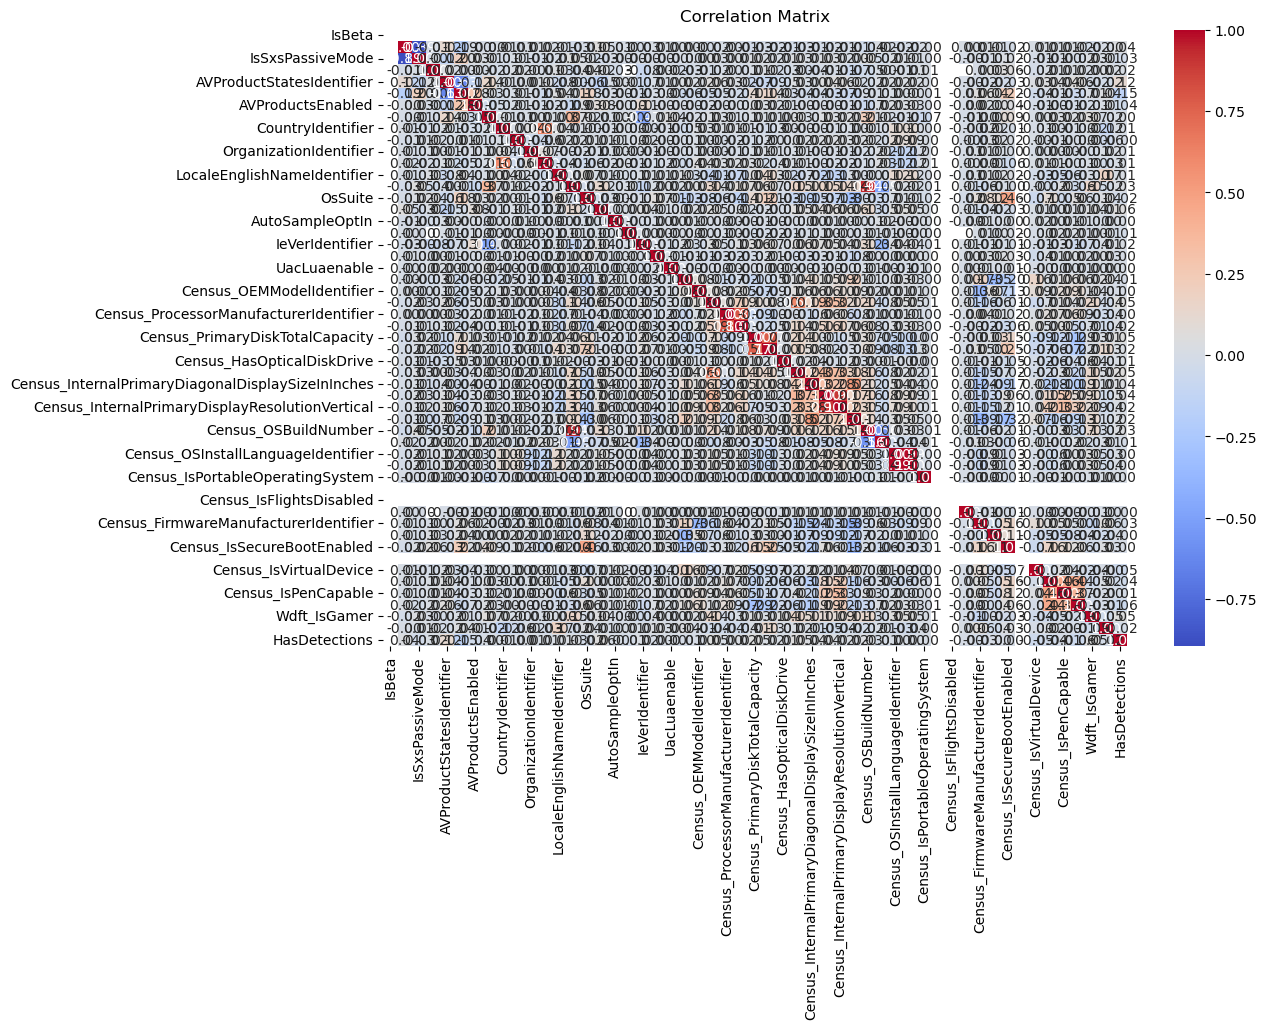

2024-07-10 07:35:08,246 - INFO - Suggesting imputation strategies.
2024-07-10 07:35:08,249 - INFO - Handling missing values.
2024-07-10 07:35:08,339 - INFO - Imputation strategies updated successfully in ../config/imputation_strategies.yaml.
2024-07-10 07:35:08,339 - INFO - Updated Imputation Strategies: {'imputation_strategies': {'RtpStateBitfield': 'mean', 'DefaultBrowsersIdentifier': 'mean', 'AVProductStatesIdentifier': 'median', 'AVProductsInstalled': 'median', 'AVProductsEnabled': 'mean', 'CityIdentifier': 'mean', 'OrganizationIdentifier': 'mean', 'GeoNameIdentifier': 'mean', 'OsBuildLab': 'mode', 'IsProtected': 'mean', 'PuaMode': 'mode', 'SMode': 'mean', 'IeVerIdentifier': 'mean', 'SmartScreen': 'mode', 'Firewall': 'mean', 'UacLuaenable': 'mean', 'Census_OEMNameIdentifier': 'mean', 'Census_OEMModelIdentifier': 'mean', 'Census_ProcessorCoreCount': 'mean', 'Census_ProcessorManufacturerIdentifier': 'mean', 'Census_ProcessorModelIdentifier': 'mean', 'Census_ProcessorClass': 'mode', '

In [2]:
import os
import sys
sys.path.append('../src')

import pandas as pd
import logging
from data.load_data import load_data
from analysis.data_understanding import initial_data_analysis, save_cleaned_data
from config_loader import load_config, get_feature_metadata

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def main():
    try:
        # Load configuration
        logger.info("Loading configuration.")
        config = load_config('../config/paths.yaml')

        # Validate file paths
        if not os.path.exists(config['data_paths']['train_data']) or not os.path.exists(config['data_paths']['test_data']):
            logger.error("One or more data paths specified in the configuration do not exist.")
            return

        # Define data types to avoid mixed types warnings
        feature_config = load_config(config['config_paths']['feature_metadata'])
        feature_metadata = get_feature_metadata(feature_config)
        dtype_mapping = {feature: 'category' if feature_metadata[feature]['data_type'] == 'category' else 'float64' 
                         for feature in feature_metadata}

        # Load a smaller chunk of the data for initial analysis with progress bar
        logger.info("Loading training data.")
        train_chunk = load_data(config['data_paths']['train_data'], nrows=100000, dtype=dtype_mapping)
        logger.info("Loading test data.")
        test_chunk = load_data(config['data_paths']['test_data'], nrows=100000, dtype=dtype_mapping)

        # Perform initial data analysis
        train_chunk, test_chunk = initial_data_analysis(train_chunk, test_chunk, config)

        # Save the cleaned data
        save_cleaned_data(train_chunk, test_chunk, config)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        raise

if __name__ == "__main__":
    main()
